<br>
<div style="text-align: right; font-family: Optima, sans-serif"> Jules Morris</div>
<div style="text-align: right; font-family: Optima, sans-serif"> January 2023</div>

<h1 style= "border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 2px; text-align: left;"> Human Resources Attrition</h1>

In [1]:
#imports
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#linear algebra
import pandas as pd
import numpy as np

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#use to change columns from CamelCase to snake_case
import inflection

<h1 style= "border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 2px; text-align: left;"> Executive Summary</h1>

- What is causing employees to leave the organization?

<h1 style= "border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 2px; text-align: left;"> Acquire</h1>

In [2]:
df = pd.read_csv('Human_Resources.csv')
print(f"Dataframe shape: {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nColumns in this dataframe:\n", df.columns)
df.head()

Dataframe shape: 1470 rows and 35 columns.

Columns in this dataframe:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<h1 style= "border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 2px; text-align: left;"> Prepare</h1>

In [3]:
#put function in prepare file

In [4]:
def df_info(df):
    '''This function will take in a dataframe and return a summary of the unique and missing values,\
    the percentage of missing values per row, and the column dtype in tabular form.'''
    
    # Show all the columns 
    pd.set_option('display.max_columns', None) 
    
    # Show all rows
    pd.set_option('display.max_rows', None) 
    print("Dtype, Unique values and Missing values(%) of each column:")
    
    #create the df
    df_info= pd.DataFrame({"Dtype": df.dtypes, 
                           "Unique values": df.nunique(),
                           "Missing values (%)": round(df.isnull().sum()/df.shape[0] * 100, 2)
                          }).rename_axis('Columns', axis='rows')  
    
    #style the df for easier readability
    df_info = df_info.style.format({'Missing values (%)': '{:,.2f}'})\
         .set_table_styles([{'selector': 'td', 'props': [('text-align', 'center'),
                                                        ('color', 'black')]},
                           {'selector': '.col_heading', 'props': [('text-align', 'center'),
                                                                  ('color', 'black'),
                                                                  ('width', '150px')]},
                           {'selector': '.row_heading', 'props': [('text-align', 'left'),
                                                                  ('color', 'black')]}])
    return df_info

In [5]:
df_info(df)

Dtype, Unique values and Missing values(%) of each column:


,Dtype,Unique values,Missing values (%)
Columns,,,
Age,int64,43,0.00
Attrition,object,2,0.00
BusinessTravel,object,3,0.00
DailyRate,int64,886,0.00
Department,object,3,0.00
DistanceFromHome,int64,29,0.00
Education,int64,5,0.00
EducationField,object,6,0.00
EmployeeCount,int64,1,0.00


- There are no missing values in this dataset, will change from SnakeCase to camel_case using  the Inflection library. 

In [6]:
#put in prepare file

In [7]:
#change column headings

column_list = list(df.columns)
for i, col in enumerate(column_list):
    column_list[i] = inflection.underscore(column_list[i].replace(' ', '_'))
    
#set columns to new column_list
df.columns = column_list
#set to lower case
df.columns = df.columns.str.lower()

In [8]:
df.describe()

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<h1 style= "border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 2px; text-align: left;"> Explore</h1>

In [9]:
#data visualization

#replace attrition, over_18, and overtime w/ 1's and 0's
#use lambda function on this column, if value is 'Yes', put 1, else put 0
df['attrition'] = df['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['over18'] = df['over18'].apply(lambda x: 1 if x == 'Y' else 0)
df['over_time'] = df['over_time'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:>

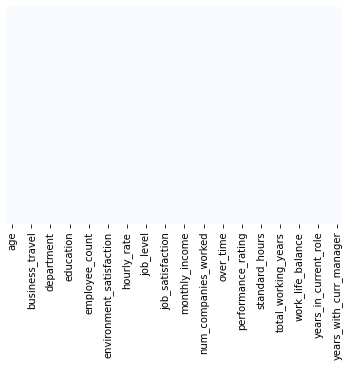

In [13]:
#any miss data?
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'attrition'}>,
        <AxesSubplot:title={'center':'daily_rate'}>,
        <AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'employee_count'}>,
        <AxesSubplot:title={'center':'employee_number'}>,
        <AxesSubplot:title={'center':'environment_satisfaction'}>,
        <AxesSubplot:title={'center':'hourly_rate'}>,
        <AxesSubplot:title={'center':'job_involvement'}>],
       [<AxesSubplot:title={'center':'job_level'}>,
        <AxesSubplot:title={'center':'job_satisfaction'}>,
        <AxesSubplot:title={'center':'monthly_income'}>,
        <AxesSubplot:title={'center':'monthly_rate'}>,
        <AxesSubplot:title={'center':'num_companies_worked'}>],
       [<AxesSubplot:title={'center':'over18'}>,
        <AxesSubplot:title={'center':'over_time'}>,
        <AxesSubplot:title={'center':'percent_salary

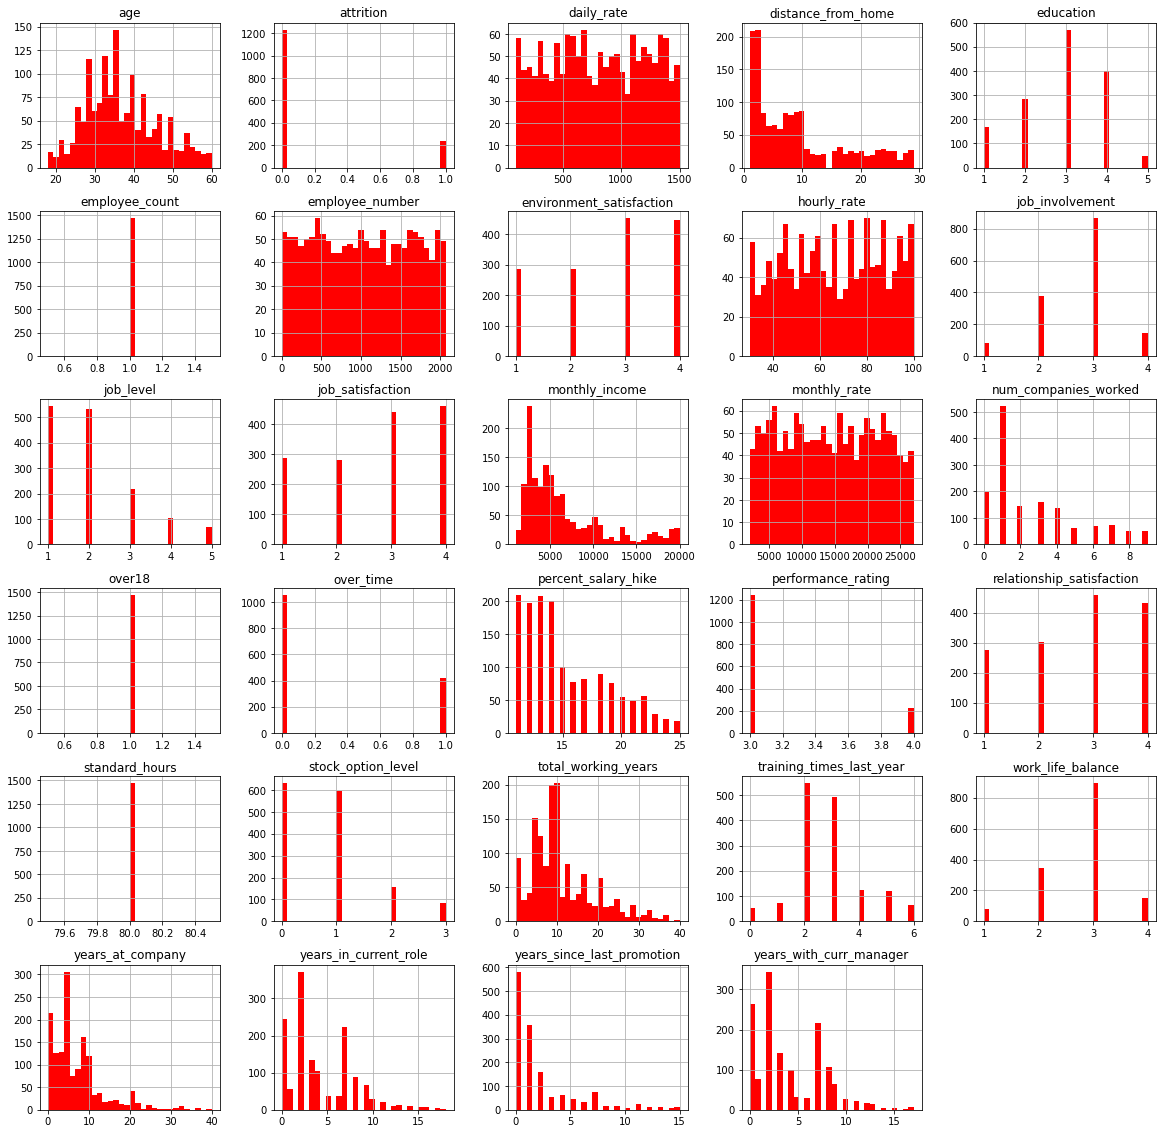

In [14]:
df.hist(bins = 30, figsize = (20, 20), color = 'r')

- employee_count, standard_hours, and over18 are columns that can be dropped since they do not change, and provide no meaningful information.

- employee_number is unique and can be dropped.

- Looking at attrition, this company does not have high turnover, which is a positive indication.

- Education is broken into 5 areas, likely High school diploma/GED, associates degree, bachelors, masters, and PhD. If that is the correct breakdown, the majority of employees have a bachelors, with a masters degree being the second most common degree in this dataset.

In [15]:
#add to prepare

In [16]:
#drop unnecessary columns, axis = 1 (entire column), inplace = True to drop it in memory
df.drop(['employee_count', 'standard_hours', 'over18', 'employee_number'], axis = 1, inplace = True)

In [17]:
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [18]:
#create separate df's to determine which employees left and which employees stayed
left_df = df[df['attrition'] == 1]
stayed_df = df[df['attrition'] == 0]

In [20]:
print('Total = ', len(df))
print('Number of employees who left = ', len(left_df))
print('Percentage of employees who left = ', 1.*len(left_df)/len(df) * 100, '%')

Total =  1470
Number of employees who left =  237
Percentage of employees who left =  16.122448979591837 %


In [21]:
print('Total = ', len(df))
print('Number of employees who stayed = ', len(stayed_df))
print('Percentage of employees who stayed = ', 1.*len(stayed_df)/len(df) * 100, '%')

Total =  1470
Number of employees who stayed =  1233
Percentage of employees who stayed =  83.87755102040816 %


In [23]:
#better way

df.attrition.value_counts(normalize = True)

0    0.838776
1    0.161224
Name: attrition, dtype: float64

In [24]:
df.attrition.value_counts()

0    1233
1     237
Name: attrition, dtype: int64

In [27]:
left_df.describe()

,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [28]:
stayed_df.describe()

,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

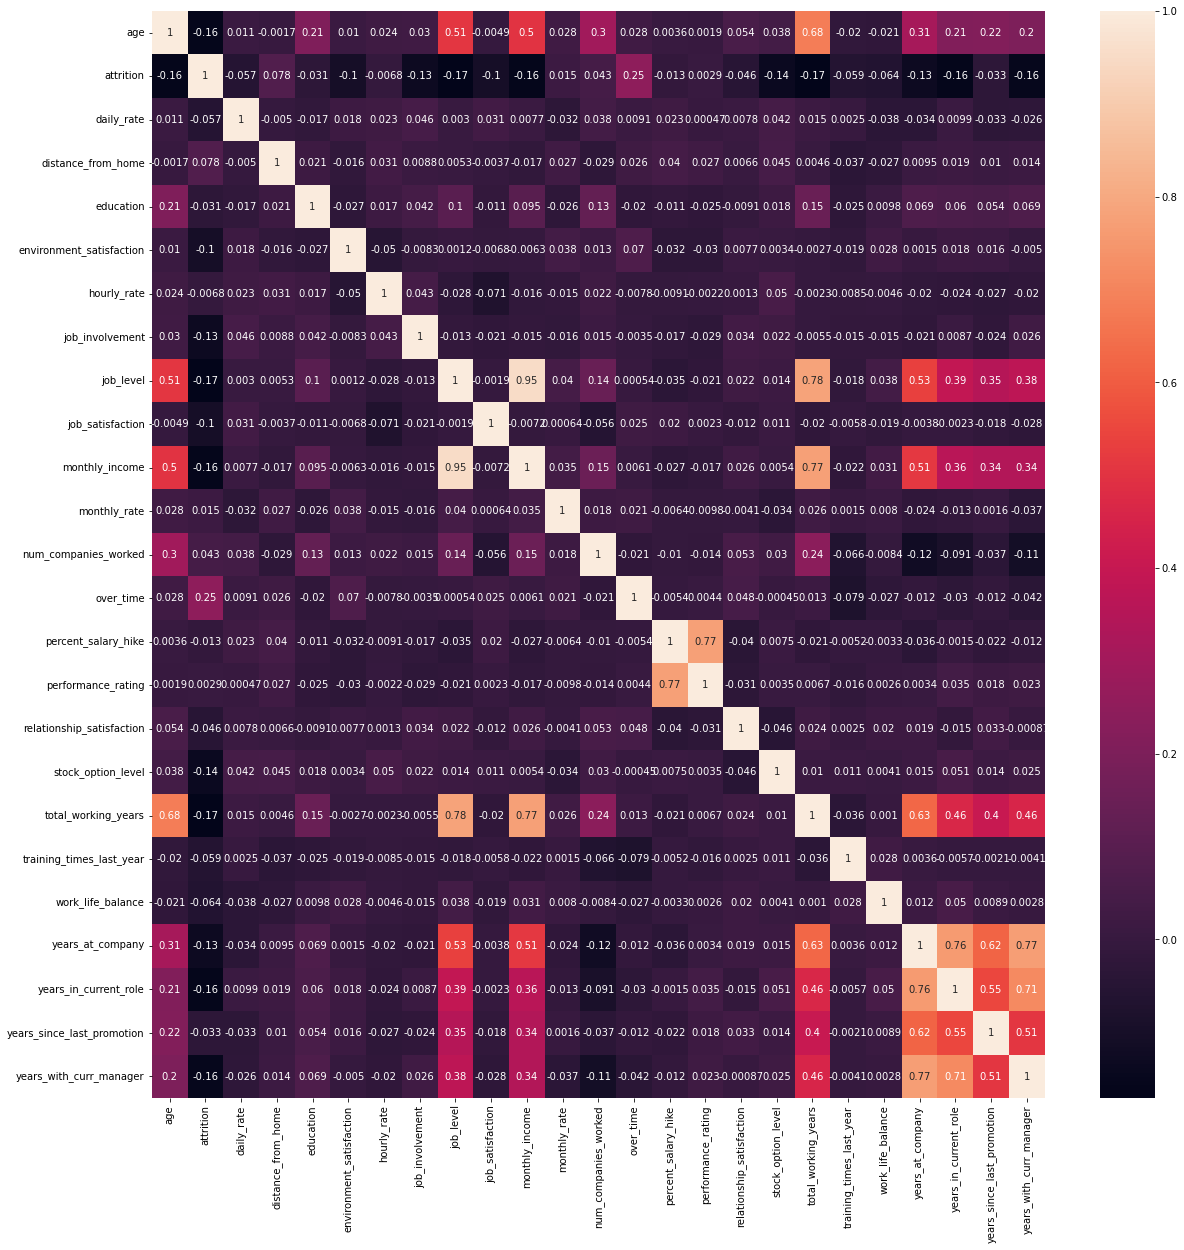

In [31]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

- Job level has a strong positive correlation with total working years
- Job level has a strong positive correlation with monthly income
- Monthly income and total working years have a strong positive correlation
- Age has a strong positive correlation with income